<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 4 - K-Nearest Neighbor (KNN) e R-Nearest Neighbor (RNN)**

---

# Fundamento do KNN e RNN

Os métodos K - Nearest Neighbors (KNN) e Radius - Nearest Neighbors (RNN) são, ambos, métodos baseados no conceito de distância e utilizam os exemplares do conjunto de treinamento para predizer novos dados [1,2,4]. 

Os métodos se diferem na forma como os exemplares de seleção são escolhidos. O método KNN utiliza os K exemplos mais próximos quanto o modelo de RNN utiliza o conceito de densidade de pontos (as amostras dentro de uma região delimitada por um raio R)[4].


A ideia do algoritmo é classificar um novo objeto com base nos exemplos do conjunto de treinamento que são mais próximos a ele [4].  Para tal, utiliza-se do conceito distância para criar um modelo $\hat{f}$, sendo mais comum a utilização da distância Euclidiana. Cada objeto associado a um rótulo representa um ponto no espaço definido pelas suas características. Esta distância é calculada pela Equação abaixo [1,2,3,4]:
$$ d(\mathbf{x}_i,\mathbf{x}_j) = \sqrt{\displaystyle\sum_{l=1}^{d} (x^l_i-x^l_j)^2} $$
onde $\mathbf{x}_i$ e $\mathbf{x}_j$ são dois objetos representados por vetores no espaço das variáveis do conjunto de características e ${x}^l_i$,${x}^l_i$ são os elementos destes vetores, que correspondem aos valores das coordenada $l$.

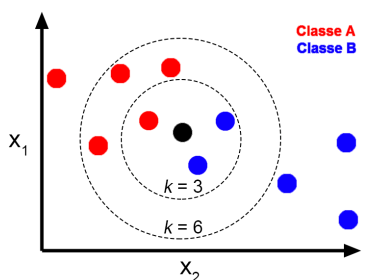


Com relação ao método RNN a diferença está na determinação do parâmetro distância ($R$), que irá ditar quantos objetos de treinamentos serão utilizados para avaliar o novo dado. A Figura abaixo ilustra o funcionamento deste método para 2 valores de $R$ distintos. 

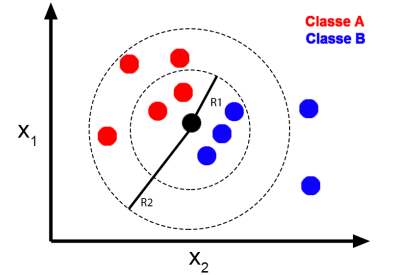

---



**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Nearest Neighbor**. 2021. Disponível
em: <https://scikit-learn.org/stable/modules/neighbors.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Exemplo de Classificação de câncer de mama

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Esse dataset já existe dentro do sklearn e ele representa uma classificação da existência de câncer maligno
# ou benigno no peito, sendo que por conveniência, tomamos como label: malignant = 0 e benign = 1
breast_cancer = load_breast_cancer()

In [2]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Como neste exemplo estamos pegando um dataset já pronto do sklearn, precisamos criar nosso vetor de resposta
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
dict_arg = {0:"malignant", 1:"benign"}

In [7]:
# Como os valores da coluna estão em string, precisamos transformá-las em uma respsota binária, para isso, podemos usar o código abaixo
# y = pd.get_dummies(y, drop_first=True) , que faz a conversão sozinho, ou podemos usar a técnica de conversão de dicionário
y_int = pd.DataFrame(breast_cancer.target,columns=["target"])
y_int['class'] = y_int['target'].map(dict_arg)
y_int.head(10)

,target,class
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant
5,0,malignant
6,0,malignant
7,0,malignant
8,0,malignant
9,0,malignant


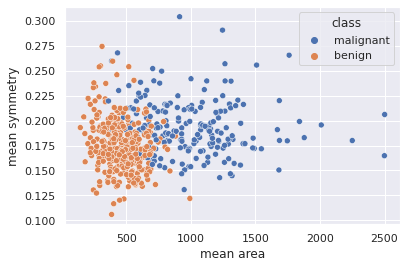

In [9]:
sns.scatterplot(data=X,x='mean area', y='mean symmetry',hue=y_int['class'] )
plt.show()

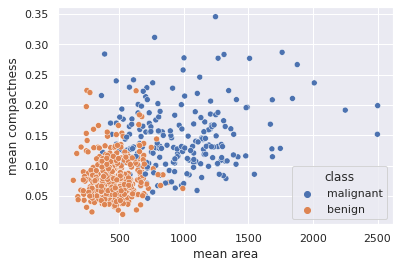

In [8]:
sns.scatterplot(data=X,x='mean area', y='mean compactness',hue=y_int['class'] )
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int['target'], test_size=0.25, random_state=0)


In [19]:
# Treino do modelo
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #minkowski
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
# Teste do modelo
y_pred = KNN.predict(X_test)

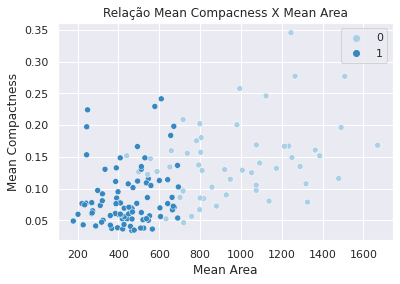

In [21]:
# Plotagem da relação mean compactness x mean area da amostra de teste utilizando o Matplot
sns.scatterplot(
    x= 'mean area',
    y = 'mean compactness',
    hue = y_pred,
    palette='Blues',
    data=X_test
)
plt.legend()
plt.title('Relação Mean Compacness X Mean Area')
plt.xlabel('Mean Area')
plt.ylabel('Mean Compactness')
plt.show()

In [22]:

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[49,  4],
       [ 5, 85]])

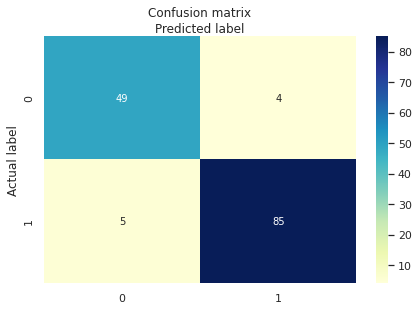

In [23]:
# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:

# Análise de eficiência
'''
Em português claro: 
Acurácia: indica uma performance absoluta do modelo. Dentre todas as classificações, quantas o modelo classificou totalmente certo
Precisão: de todos os classificados positivo pelo modelo, quais realmente eram positivos
Recall/Revocação/Sensibilidade: dentre todos os valores positivos no dataset, quantas estão corretas classificadas corretamente
'''

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9370629370629371
Precision: 0.9550561797752809
Recall: 0.9444444444444444


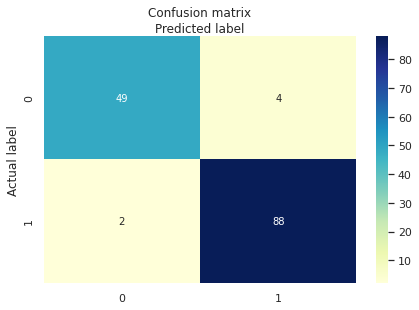

Accuracy: 0.958041958041958
Precision: 0.9565217391304348
Recall: 0.9777777777777777


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int['target'], test_size=0.25, random_state=0)

# Treino do modelo
KNN = KNeighborsClassifier(n_neighbors=25, weights="distance" ,metric='euclidean')
KNN.fit(X_train, y_train)

# Teste do modelo
y_pred = KNN.predict(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Exemplo de Classificação de tipos diferentes de vidro

In [26]:
'''
Dataset contendo 7 tipos diferentes de vidro. O conjunto de dados contêm 9 parâmetros sobre a estrutura físico-química do material.
Link: https://www.kaggle.com/uciml/glass

'''


df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [28]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


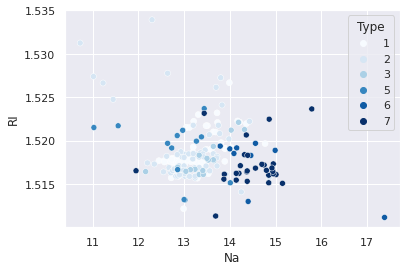

In [29]:
# Vamos visualizar a distribuição do nosso dataset

sns.scatterplot(data=df,x="Na",y="RI",hue="Type",palette='Blues')
plt.show()

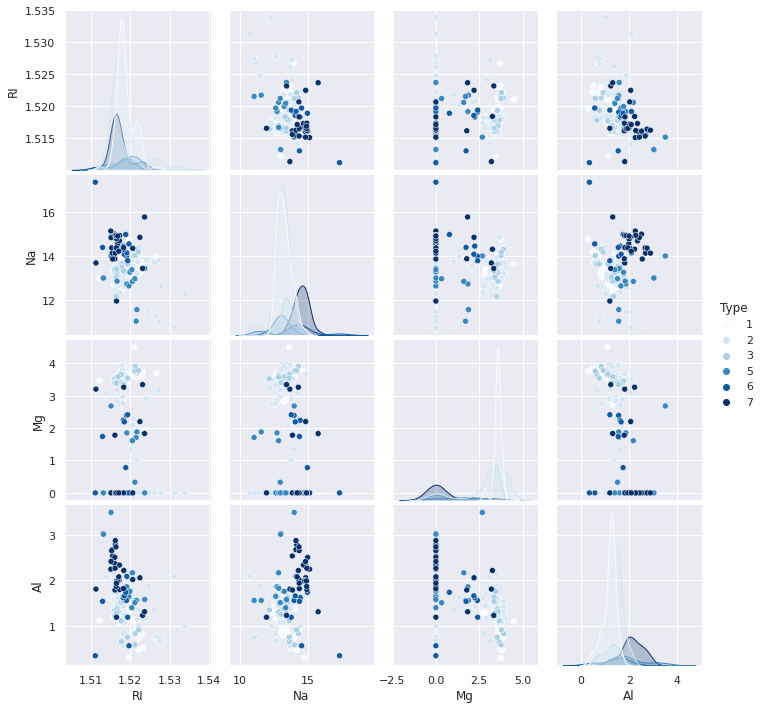

In [30]:
# Uma maneira rápida de visualizar todos os tipos de correlação entre as variáveis é utilizando o sns.pairplot()

sns.pairplot(df[["RI","Na","Mg","Al","Type"]],palette='Blues', hue='Type')
plt.show()

In [31]:
# Nesta aula, utilizaremos uma redução de dimensionalidade pra tentar visualizar melhor o nosso dataset
from sklearn.decomposition import PCA
X = df.iloc[:,0:9]
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
new_X = pca.transform(X)

In [33]:
new_X[:,0]

array([-1.43142469e+00, -1.43670679e+00, -1.42732181e+00, -1.25782481e+00,
       -1.31246639e+00, -1.30186751e+00, -1.23656984e+00, -1.20334882e+00,
       -1.10099202e+00, -1.07355552e+00, -1.18786885e+00, -1.01843362e+00,
       -1.20019256e+00, -1.06407634e+00, -1.01057468e+00, -1.04904396e+00,
       -9.39225701e-01, -6.97628245e-01, -7.80810191e-01, -9.83003526e-01,
       -9.48618596e-01, -7.43642764e-01, -8.91273232e-01, -9.30690043e-01,
       -9.77530002e-01, -9.55523845e-01, -9.59380374e-01, -9.69669701e-01,
       -9.26178352e-01, -9.36572288e-01, -8.60106379e-01, -9.13664157e-01,
       -8.82594208e-01, -8.89493392e-01, -7.98300562e-01, -8.48822383e-01,
       -7.29054857e-01, -8.06709157e-01, -4.12503795e-01, -4.12503795e-01,
       -7.70339807e-01, -7.95879454e-01, -7.90137750e-01, -3.12734099e-01,
       -7.21824321e-01, -5.61453062e-01, -6.17808215e-01, -1.39729484e-01,
       -7.61126842e-02, -5.36714413e-01, -1.18079655e-02, -3.72975951e-01,
       -1.15000735e-01, -

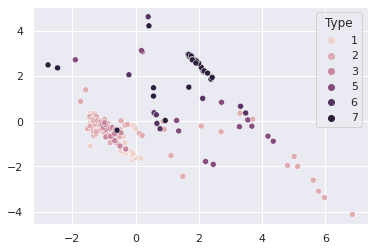

In [34]:
sns.scatterplot(x = new_X[:,0],y = new_X[:,1],hue=df.Type)
plt.show()

In [35]:
# Separando treino e teste
X = df.iloc[:,0:9]
y = df.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treino do modelo
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN.fit(X_train, y_train)

# Teste do modelo
y_pred = KNN.predict(X_test)

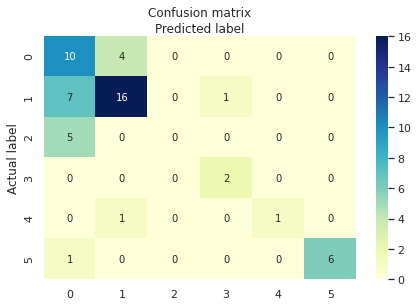

Accuracy: 0.6481481481481481


In [36]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# RNN

# Exemplo de Classificação de câncer de mama

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Esse dataset já existe dentro do sklearn e ele representa uma classificação da existência de câncer maligno
# ou benigno no peito, sendo que por conveniência, tomamos como label: malignant = 0 e benign = 1
breast_cancer = load_breast_cancer()

In [38]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
dict_arg = {0:"malignant", 1:"benign"}
y_int = pd.DataFrame(breast_cancer.target,columns=["target"])
y_int['class'] = y_int['target'].map(dict_arg)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int['target'], test_size=0.25, random_state=0)

In [46]:
# Treino do modelo
RNN = RadiusNeighborsClassifier(radius=150,outlier_label=0)
RNN.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=0, p=2,
                          radius=150, weights='uniform')

In [47]:

# Teste do modelo
y_pred = RNN.predict(X_test)

In [48]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47,  6],
       [ 2, 88]])

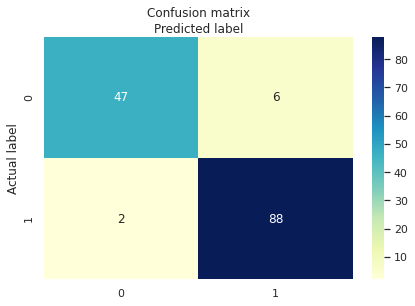

Accuracy: 0.9440559440559441
Precision: 0.9361702127659575
Recall: 0.9777777777777777


In [49]:
# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

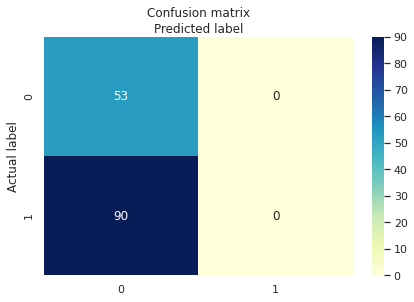

Accuracy: 0.3706293706293706
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int['target'], test_size=0.25, random_state=0)

# Treino do modelo
RNN = RadiusNeighborsClassifier(radius="0.5",weights="distance",outlier_label=0)
RNN.fit(X_train, y_train)

# Teste do modelo
y_pred = RNN.predict(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [51]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
X_new = transformer.fit_transform(X)
X_new = pd.DataFrame(X_new, columns=X.columns)
X_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


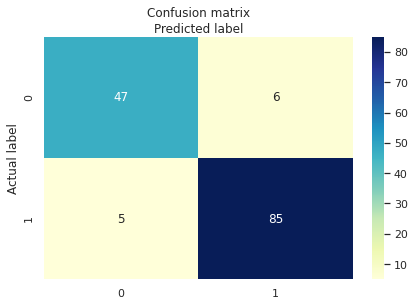

Accuracy: 0.9230769230769231
Precision: 0.9340659340659341
Recall: 0.9444444444444444


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_int['target'], test_size=0.25, random_state=0)

# Treino do modelo
RNN = RadiusNeighborsClassifier(radius="0.5",weights="distance",outlier_label=0)
RNN.fit(X_train, y_train)

# Teste do modelo
y_pred = RNN.predict(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Exemplo de Classificação de tipos diferentes de vidro

In [54]:
'''
Dataset contendo 7 tipos diferentes de vidro. O conjunto de dados contêm 9 parâmetros sobre a estrutura físico-química do material.
Link: https://www.kaggle.com/uciml/glass

'''


df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/CT-600%20Est%C3%A1gio%20Doc%C3%AAncia/dataset/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
# Separando em Treino/ Teste
X = df.iloc[:,0:9]
y = df.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treino do modelo
RNN = RadiusNeighborsClassifier(radius=2.5,outlier_label=5,metric="euclidean",weights="distance")
RNN.fit(X_train, y_train)

# Teste do modelo
y_pred = RNN.predict(X_test)


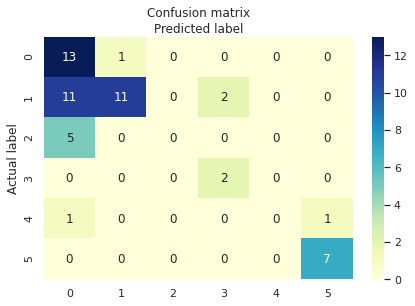

Accuracy: 0.6111111111111112


In [61]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


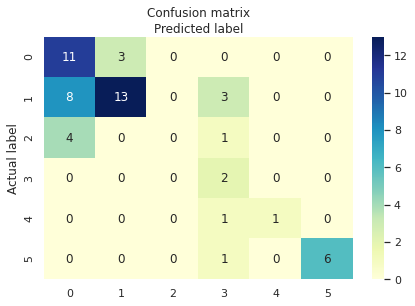

Accuracy: 0.6111111111111112


In [67]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
X_new = transformer.fit_transform(X)
X_new = pd.DataFrame(X_new, columns=X.columns)

# Separando em Treino/ Teste
X = df.iloc[:,0:9]
y = df.Type
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

# Treino do modelo
RNN = RadiusNeighborsClassifier(radius=0.255,outlier_label=5, metric="euclidean",weights="distance")
RNN.fit(X_train, y_train)

# Teste do modelo
y_pred = RNN.predict(X_test)

# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Plotagem da matriz de confusão

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Análise de eficiência

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
